Copyright by Arjun Sarkar Research Group Applied Systems Biology - Head: Prof. Dr. Marc Thilo Figge https://www.leibniz-hki.de/en/applied-systems-biology.html HKI-Center for Systems Biology of Infection Leibniz Institute for Natural Product Research and Infection Biology - Hans Knöll Insitute (HKI) Adolf-Reichwein-Straße 23, 07745 Jena, Germany

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 as cv
import math
import os
from sklearn import preprocessing

from PIL import Image
from skimage.filters import unsharp_mask

In [2]:
path_images = '/asbdata/Arjun/TIFF8/'

df = pd.read_csv('Labels.csv')
df.head()

,Video_Num,infection,Patient
0,1,ca,1
1,2,cg,1
2,3,mock,1
3,4,ca,2
4,5,cg,2


[[120 120 119 ... 124 122  91]
 [120 122 120 ... 125 124  92]
 [120 121 122 ... 124 122  94]
 ...
 [119 120 118 ... 118 114  76]
 [115 118 115 ... 118 112  72]
 [117 119 120 ... 118 113  75]]


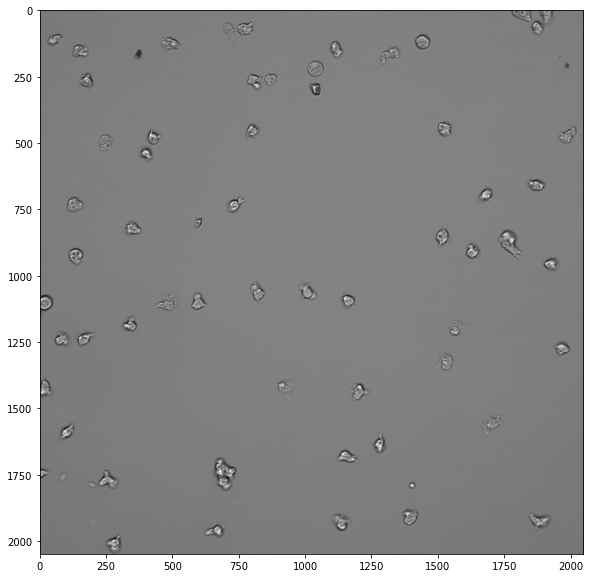

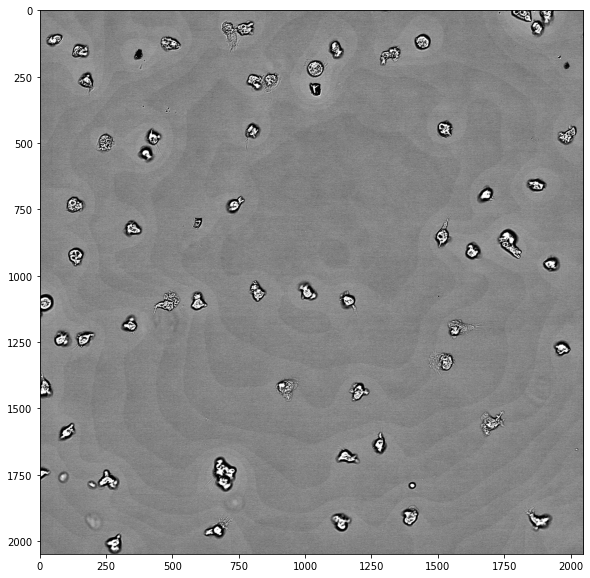

[[103 117 100 ... 127 129   0]
 [102 132  97 ... 142 157   0]
 [100 114 127 ... 126 127   0]
 ...
 [138 154 120 ... 138 116   0]
 [ 77 124  72 ... 141 103   0]
 [112 138 152 ... 143 112   0]]
(2048, 2048)


In [3]:
def image_preprocessing(image):
    
    # add gaussian noise
    image = cv.addWeighted (image, 4, cv.GaussianBlur (image, (0,0), 50), -4, 128)
    
    # add clahe
    clahe = cv.createCLAHE(clipLimit=5.0, tileGridSize=(8,8))
    image = clahe.apply(image)
    # Apply unsharp mask to sharpen the image
    sharpened_image = unsharp_mask(image, radius=1, amount=1)

    # Convert the result back to uint8 (0-255) range
    result = np.clip(sharpened_image * 255, 0, 255).astype(np.uint8)
    
    return result

image = cv.imread('/asbdata/Arjun/Bloodi/TIFF8/1/005.tif',0)
print(image)

plt.figure(figsize=(10,10))
plt.imshow(image,cmap='gray')
plt.show()

# apply image preprocessing
image = image_preprocessing(image)

plt.figure(figsize=(10,10))
plt.imshow(image,cmap='gray')
plt.show()
print(image)

print(image.shape)

In [4]:
list_files = []
path_images = '/asbdata/Arjun/Bloodi/TIFF8/'


def store_images(image, image_name, Video_num, infection, patient):

    im = Image.fromarray(image)
    im.save(f'/asbdata/Arjun/Bloodi/TIFF8_preprocessed/{Video_num}/{image_name}')
    
    list_files.append([Video_num, image_name, infection, patient])
        
def create_preprocessed(image, image_name, Video_num, infection, patient):
    
    image = image_preprocessing(image)
            
    image_storage = store_images(image, image_name, Video_num, infection, patient)

In [5]:
for i,item in df.iterrows():
    
    Video_num = str(item[0])
    infection = str(item[1])
    patient = str(item[2])
    
    image_list = os.listdir(path_images + Video_num)
    
    for images in image_list:
        
        image_name = images
        
        image = cv.imread(path_images + '/' + Video_num + '/' + images,0)
        create_preprocessed(image, image_name, Video_num, infection, patient)

In [6]:
df_patches = pd.DataFrame(list_files, columns =['video_num','filename','infection','patient'])
df_patches

,video_num,filename,infection,patient
0,1,246.tif,ca,1
1,1,094.tif,ca,1
2,1,158.tif,ca,1
3,1,062.tif,ca,1
4,1,174.tif,ca,1
...,...,...,...,...
7015,35,177.tif,mock,12
7016,35,066.tif,mock,12
7017,35,042.tif,mock,12
7018,35,250.tif,mock,12


In [7]:
df_patches.to_csv('Label_preprocessed.csv',index=False)